In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_colwidth', None)

[Skup podataka](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

Atributi/kolone:
* survival:    Survival 
* PassengerId: Unique Id of a passenger. 
* pclass:    Ticket class     
* sex:    Sex     
* Age:    Age in years     
* sibsp:    # of siblings / spouses aboard the Titanic     
* parch:    # of parents / children aboard the Titanic     
* ticket:    Ticket number     
* fare:    Passenger fare     
* cabin:    Cabin number     
* embarked:    Port of Embarkation

In [3]:
data = pd.read_csv('train.csv')

### Data analysis

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

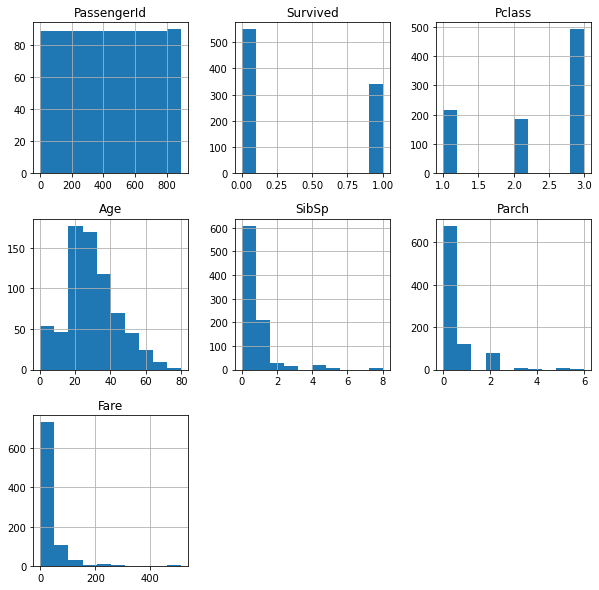

In [11]:
data.hist(figsize = [10,10])

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

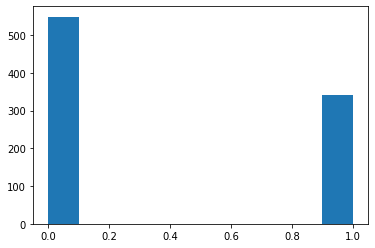

In [12]:
plt.hist(data['Survived'])

In [13]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Data preprocessing

In [14]:
data.drop(['PassengerId'], axis=1, inplace=True)

In [15]:
data.drop(['Cabin'], axis=1, inplace=True)

In [16]:
data['Age'] = data['Age'].fillna(value=data['Age'].median())

In [17]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data['Embarked'] = data['Embarked'].fillna(value='S')

In [ ]:
# data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [20]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [21]:
data['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [22]:
data.drop(['Name'], axis=1, inplace=True)

In [23]:
data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [24]:
data.drop(['Ticket'], axis=1, inplace=True)

In [25]:
data['relatives'] = data['SibSp'] + data['Parch']

In [26]:
data.loc[data['relatives'] > 0, 'not_alone'] = 0
data.loc[data['relatives'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)
data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [27]:
data['Fare_Per_Person'] = data['Fare']/(data['relatives']+1)

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,not_alone,Fare_Per_Person
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,0,3.62500
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,0,35.64165
2,1,3,female,26.0,0,0,7.9250,S,Miss,0,1,7.92500
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,0,26.55000
4,0,3,male,35.0,0,0,8.0500,S,Mr,0,1,8.05000


In [29]:
data.shape

(891, 12)

### Feature selection

In [30]:
X = data.drop(columns=['Survived'])

In [31]:
y = data.Survived

<AxesSubplot:>

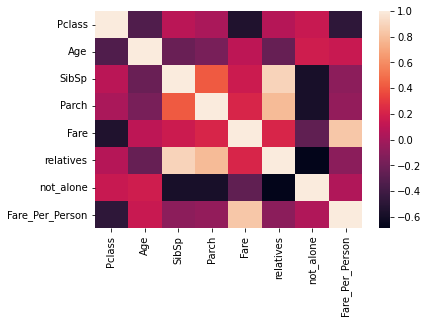

In [32]:
sns.heatmap(X.corr())

In [33]:
corrcoefs = []
for feature in X.select_dtypes(include=np.number): 
    corrcoef = np.corrcoef(data[feature].values, data.Survived)[0, 1] 
    corrcoefs.append(corrcoef)
    print(feature, corrcoef)

Pclass -0.3384810359610148
Age -0.06491041993052583
SibSp -0.03532249888573557
Parch 0.08162940708348361
Fare 0.2573065223849622
relatives 0.01663898928274525
not_alone -0.203367085699892
Fare_Per_Person 0.22159990528456922


In [34]:
data.groupby('Survived').agg(['mean', 'median'])

Pclass               Age            SibSp            Parch         \
              mean median       mean median      mean median      mean median   
Survived                                                                        
0         2.531876    3.0  30.028233   28.0  0.553734    0.0  0.329690    0.0   
1         1.950292    2.0  28.291433   28.0  0.473684    0.0  0.464912    0.0   

               Fare        relatives        not_alone        Fare_Per_Person  \
               mean median      mean median      mean median            mean   
Survived                                                                       
0         22.117887   10.5  0.883424    0.0  0.681239    1.0       13.651162   
1         48.395408   26.0  0.938596    1.0  0.476608    0.0       29.973691   

                  
          median  
Survived          
0          7.925  
1         13.000

In [ ]:
sns.pairplot(data, hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

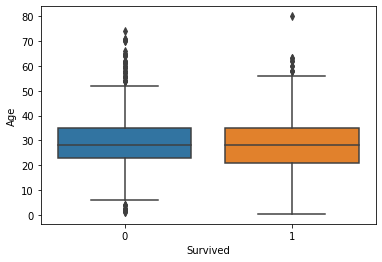

In [35]:
sns.boxplot(x='Survived', y='Age', data=data)

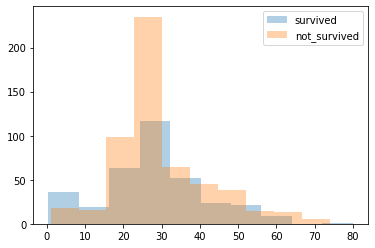

In [36]:
fig, ax = plt.subplots()
ax.hist(data[data['Survived']==1].Age.dropna(), label = 'survived', alpha = 0.35)
ax.hist(data[data['Survived']==0].Age.dropna(), label = 'not_survived', alpha = 0.35)
ax.legend()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

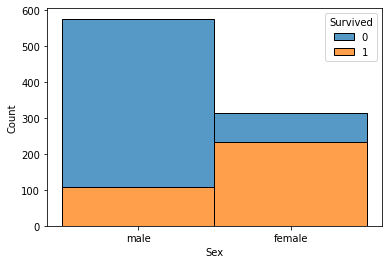

In [37]:
sns.histplot(x='Sex', hue='Survived', data=data, stat="count", multiple="stack")

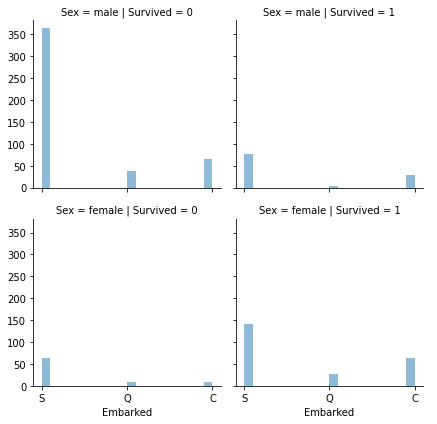

In [41]:
grid = sns.FacetGrid(data, col='Survived', row='Sex')
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)
grid.add_legend()

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

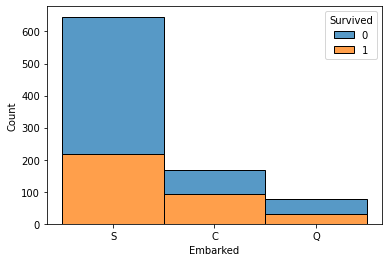

In [39]:
sns.histplot(x='Embarked', hue='Survived', data=data, stat="count", multiple="stack")

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

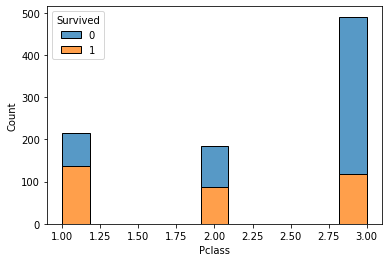

In [40]:
sns.histplot(x='Pclass', hue='Survived', data=data, stat="count", multiple="stack")

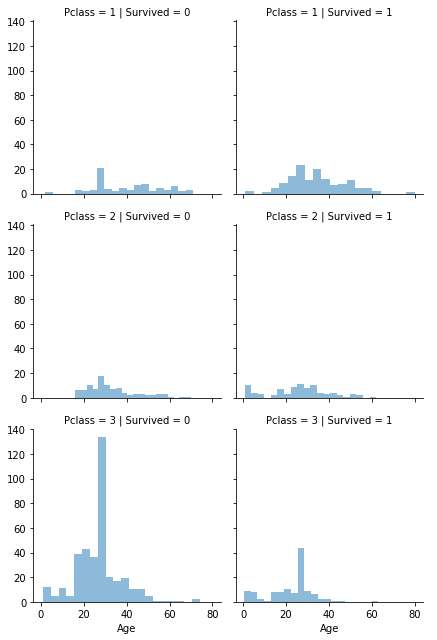

In [42]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Building models

In [43]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

In [44]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors

In [45]:
X.dtypes

Pclass               int64
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Title               object
relatives            int64
not_alone            int32
Fare_Per_Person    float64
dtype: object

In [46]:
# Dummy variables
X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'Embarked', 'Title'])

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=23, stratify = y)

In [48]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
def evaluate(model):
    y_pred = model.predict(X_test)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
    print('Precision: ', metrics.precision_score(y_test, y_pred))
    print('Recall: ', metrics.recall_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    try:
        y_pred_proba = model.predict_proba(X_test)[::,1]
    except:
        y_pred_proba = model._predict_proba_lr(X_test)[::,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label="AUC="+str(auc))
    plt.ylabel('True Positive')
    plt.xlabel('False Positive')
    plt.legend(loc=4)
    plt.show()

In [50]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Accuracy:  0.8171641791044776
Precision:  0.7872340425531915
Recall:  0.7184466019417476
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       165
           1       0.79      0.72      0.75       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



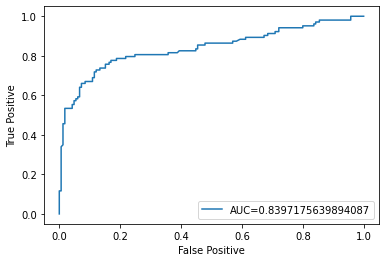

In [51]:
evaluate(logreg)

In [52]:
decision_tree = tree.DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy:  0.7649253731343284
Precision:  0.7040816326530612
Recall:  0.6699029126213593
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       165
           1       0.70      0.67      0.69       103

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



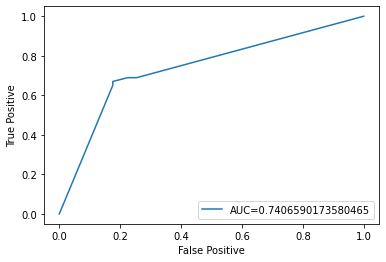

In [53]:
evaluate(decision_tree)

In [54]:
random_forest = ensemble.RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Accuracy:  0.8134328358208955
Precision:  0.7731958762886598
Recall:  0.7281553398058253
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       165
           1       0.77      0.73      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



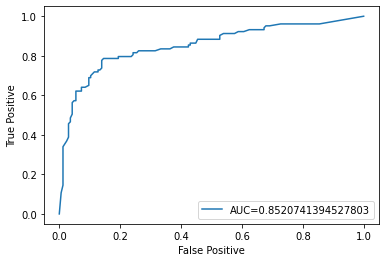

In [55]:
evaluate(random_forest)

In [56]:
linear_svc = svm.LinearSVC()
linear_svc.fit(X_train, y_train)

C:\Users\vilda\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Accuracy:  0.832089552238806
Precision:  0.8222222222222222
Recall:  0.7184466019417476
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       165
           1       0.82      0.72      0.77       103

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



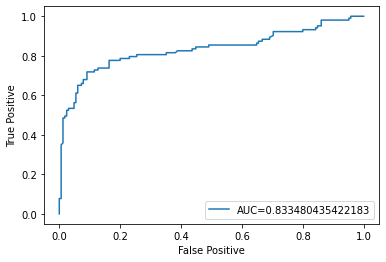

In [57]:
evaluate(linear_svc)

In [58]:
svc = svm.SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

Accuracy:  0.8246268656716418
Precision:  0.868421052631579
Recall:  0.6407766990291263
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       165
           1       0.87      0.64      0.74       103

    accuracy                           0.82       268
   macro avg       0.84      0.79      0.80       268
weighted avg       0.83      0.82      0.82       268



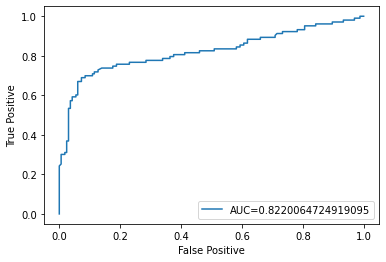

In [59]:
evaluate(svc)

In [60]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy:  0.8022388059701493
Precision:  0.7840909090909091
Recall:  0.6699029126213593
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       165
           1       0.78      0.67      0.72       103

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



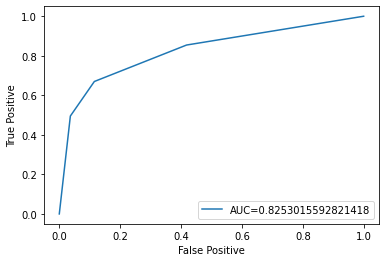

In [61]:
evaluate(knn)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn import pipeline

In [63]:
rf = pipeline.make_pipeline(preprocessing.StandardScaler(), ensemble.RandomForestClassifier(n_estimators=100))
scores = cross_val_score(rf, X, y, cv=10, scoring = "accuracy")
print(scores)
print('k-Fold accuracy: ', scores.mean())

[0.74444444 0.85393258 0.74157303 0.82022472 0.86516854 0.85393258
 0.79775281 0.71910112 0.82022472 0.83146067]
k-Fold accuracy:  0.8047815230961298


In [64]:
random_forest.feature_importances_

array([0.16059598, 0.0263885 , 0.01954382, 0.14325272, 0.0425734 ,
       0.01006693, 0.15044571, 0.09586662, 0.07543829, 0.02088561,
       0.01517492, 0.04262153, 0.00971663, 0.00926819, 0.01175906,
       0.01030117, 0.02862078, 0.09904492, 0.02053459, 0.00790065])

In [65]:
imp = pd.DataFrame({'feature': X.columns, 'importance': random_forest.feature_importances_}).sort_values(by='importance')

In [66]:
imp

,feature,importance
19,Title_Rare,0.007901
13,Embarked_Q,0.009268
12,Embarked_C,0.009717
5,not_alone,0.010067
15,Title_Master,0.010301
14,Embarked_S,0.011759
10,Pclass_2,0.015175
2,Parch,0.019544
18,Title_Mrs,0.020535
9,Pclass_1,0.020886


<BarContainer object of 20 artists>

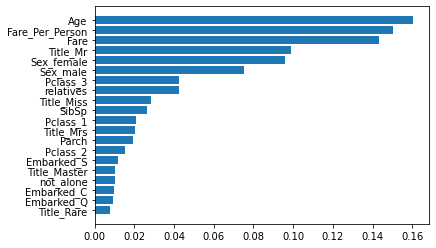

In [67]:
plt.barh(imp.feature, imp.importance)

In [68]:
X.drop(columns='not_alone', inplace=True)

In [69]:
scores = cross_val_score(rf, X, y, cv=10, scoring = "accuracy")
print(scores)
print('k-Fold accuracy: ', scores.mean())

[0.75555556 0.82022472 0.75280899 0.80898876 0.86516854 0.85393258
 0.78651685 0.74157303 0.80898876 0.84269663]
k-Fold accuracy:  0.8036454431960051


In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
X_train_validation, X_test, y_train_validation, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify = y, random_state = 25)

In [74]:
params = { 'rf__criterion' : ['gini', 'entropy'], 'rf__min_samples_leaf' : [5, 10, 25, 50], 
              'rf__n_estimators': [100, 400, 700]}
grid_model = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler()), 
                                      ('rf', ensemble.RandomForestClassifier())])
grid = GridSearchCV(grid_model, param_grid=params, scoring='accuracy', cv=10, return_train_score=True)
grid.fit(X_train_validation, y_train_validation)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__min_samples_leaf': [5, 10, 25, 50],
                         'rf__n_estimators': [100, 400, 700]},
             return_train_score=True, scoring='accuracy')

In [75]:
grid.best_score_

0.8283410138248847

In [76]:
grid.best_params_

{'rf__criterion': 'entropy',
 'rf__min_samples_leaf': 5,
 'rf__n_estimators': 100}

In [77]:
random_forest_final = ensemble.RandomForestClassifier(criterion=grid.best_params_['rf__criterion'], 
                                                       min_samples_leaf=grid.best_params_['rf__min_samples_leaf'],
                                                        n_estimators=grid.best_params_['rf__n_estimators'])

In [78]:
random_forest_final.fit(X_train_validation, y_train_validation)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5)

Accuracy:  0.8432835820895522
Precision:  0.8210526315789474
Recall:  0.7572815533980582
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1       0.82      0.76      0.79       103

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



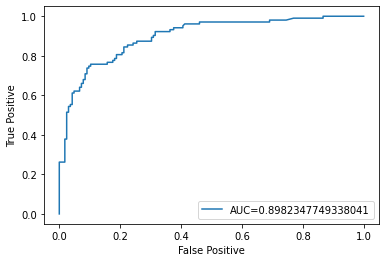

In [79]:
evaluate(random_forest_final)